In [ ]:
%pip install selenium
%pip install beautifulsoup4
%pip install plotly
%pip install seaborn
%pip install scipy
%pip install nbformat
%pip install dash_bootstrap_components

Etap 1: Zbieranie danych

In [1]:
from web_scraping import scrap_data

data = scrap_data()

The chromedriver version (131.0.6778.69) detected in PATH at I:\ChromeDriver\chromedriver.exe might not be compatible with the detected chrome version (132.0.6834.111); currently, chromedriver 132.0.6834.110 is recommended for chrome 132.*, so it is advised to delete the driver in PATH and retry


Etap 2: Czyszczenie danych

In [2]:
import pandas as pd
from cleaning import clean_data

# Dane wejściowe
df = pd.DataFrame(data)

# Przetwarzanie danych
df = clean_data(df)


In [4]:
df['Data wydania'] = pd.to_datetime(df['Data wydania'])

# Ekstrakcja roku z kolumny 'Data wydania' i zapisanie jako nowa kolumna 'Rok wydania'
df['Rok wydania'] = df['Data wydania'].dt.year

In [4]:
display(df)

,Tytuł,Tagi,Cena,Data wydania,Nacechowanie recenzji,Liczba recenzji,"Tag_2,5D",Tag_2D,Tag_3D,Tag_4X,...,Tag_Znaczące wybory,Tag_Zombie,Tag_Zręcznościowe,Tag_Łamigłówki,Tag_Łamigłówki platformowe,Tag_Łupy,Tag_Śledztwo,Tag_Świetna ścieżka dźwiękowa,Tag_Żeńska postać w roli głównej,Rok wydania
0,Cyberpunk 2077,"Cyberpunk, Otwarty świat, Nagość, RPG, Jednoos...",89.55,2020-12-10,Bardzo pozytywne,717933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020
1,Dying Light 2 Stay Human: Reloaded Edition,"Otwarty świat, Kooperacja, Zombie, Parkour, Wi...",65.99,2022-02-04,W większości pozytywne,137591,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2022
2,Marvel Rivals,"Free to Play, Wieloosobowe, Strzelanka z bohat...",0.00,2024-12-06,Bardzo pozytywne,189441,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2024
3,Among Us,"Wieloosobowe, Sieciowa kooperacja, Dedukcyjne ...",10.79,2018-11-16,Bardzo pozytywne,612217,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
4,STAR WARS Jedi: Ocalały™,"Akcja, Przygodowe, Souls-like, Jednoosobowe, P...",74.97,2023-04-28,Mieszane,56330,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Dates & Wires: Augmented Edition,"Powieść wizualna, Cyberpunk, Symulator randkow...",36.99,2024-11-11,Pozytywne,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2024
488,Genome Guardian,"Roguelike akcji, Strzelanka, Roguelite, Dostos...",38.48,2024-05-07,Bardzo pozytywne,398,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2024
489,DYSMANTLE,"Survival, Otwarty świat, Wytwarzanie, Zombie, RPG",91.99,2021-11-16,Bardzo pozytywne,9745,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2021
490,X4: Foundations,"Symulator kosmiczny, Symulatory, Piaskownica, ...",199.99,2018-11-30,W większości pozytywne,18646,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018


Etap 4: Analiza danych

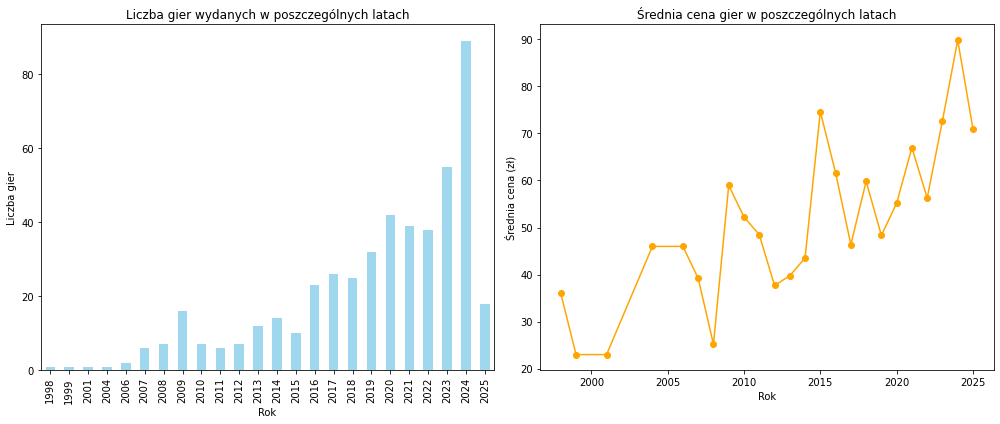

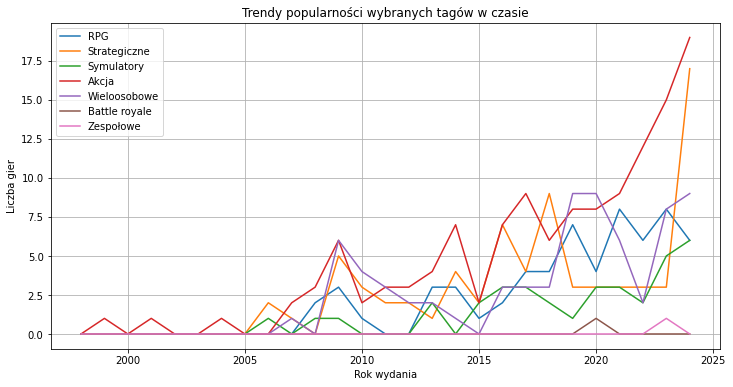

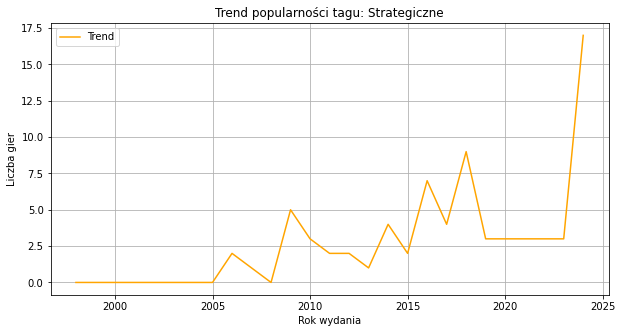

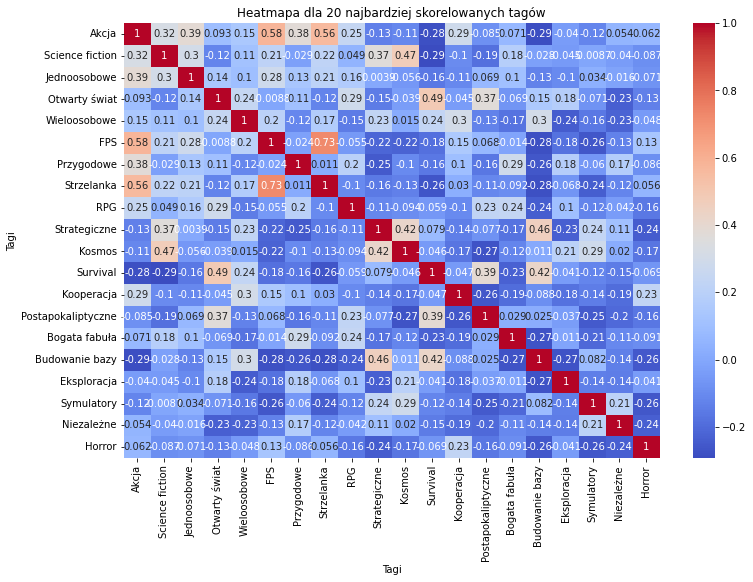

In [5]:
from analyzing import analyze_data

analyze_data(df)

Etap 5: Dashboard

In [1]:
import pandas as pd
df = pd.read_csv("your_file_name.csv")

In [3]:
from dashboard import create_dashboard

create_dashboard(df)

In [1]:
import subprocess
import webbrowser
from time import sleep

# Definiuje ścieżkę do skryptu dashboardu
script_path = 'dashboard.py'

# Uruchomienie skryptu jako oddzielny proces
proc = subprocess.Popen(['python', script_path], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Opcjonalnie: otwórz automatycznie przeglądarkę po kilku sekundach
sleep(3)  # Czekaj na uruchomienie Dash
webbrowser.open_new('http://127.0.0.1:8050/')

# Czekaj, aż użytkownik zechce zatrzymać dashboard
input("Press Enter to shutdown dashboard...\n")

# Zamykanie dashboardu
proc.terminate()


In [18]:
import dash
from dash import dcc, html, Input, Output, dash_table
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd

# Załaduj dane
data = pd.read_csv('your_file_name.csv')
data['Rok wydania'] = pd.to_datetime(data['Data wydania']).dt.year

# Usuń 'Tag_' z nazw tagów
tag_columns = [col.replace('Tag_', '') for col in data.columns if col.startswith('Tag_')]

# Inicjalizacja aplikacji Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout aplikacji
app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Dashboard gier"), className="mb-4")),
    
    dbc.Row([
        dbc.Col([
            html.Label('Filtruj gry po tagach:'),
            dcc.Dropdown(
                id='tag-filter',
                options=[{'label': tag, 'value': 'Tag_' + tag} for tag in tag_columns],
                multi=True,
                placeholder="Wybierz tagi do analizy"
            ),
            html.Label('Wybierz nacechowanie recenzji:', style={'margin-top': '20px'}),
            dcc.Checklist(
                id='review-filter',
                options=[{'label': v, 'value': v} for v in data['Nacechowanie recenzji'].unique()],
                value=[v for v in data['Nacechowanie recenzji'].unique()],
                inline=True
            ),
        ], width=4),
        dbc.Col([
            html.Label('Zakres cen:', style={'margin-top': '20px'}),
            dcc.RangeSlider(
                id='price-range',
                min=data['Cena'].min(),
                max=data['Cena'].max(),
                step=1,
                value=[data['Cena'].min(), data['Cena'].max()],
                marks=None
            ),
            html.Div(id='price-range-label', style={'margin-top': '10px'})
        ], width=8)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col([
            html.Label('Histogram cen gier'),
            dcc.Graph(id='price_histogram'),
        ], width=6),
        dbc.Col([
            html.Label('Nacechowanie recenzji - Wykres kołowy'),
            dcc.Graph(id='review_pie_chart'),
        ], width=6)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col([
            html.Label('Trendy w tagach gier w ciągu lat'),
            dcc.Graph(id='tags_over_years'),
        ], width=12)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col([
            html.Label('Popularność tagów (filtrowana przez nacechowanie)'),
            dcc.Graph(id='tag_popularity', style={'height': '500px'}),
        ], width=12)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col([
            html.Label('Interaktywna tabela gier'),
            dash_table.DataTable(
                id='data-table',
                columns=[{"name": i, "id": i} for i in data[['Tytuł', 'Cena', 'Data wydania', 'Nacechowanie recenzji']].columns],
                style_table={'overflowX': 'auto', 'overflowY': 'auto', 'height': '300px'},
                page_size=10,
                style_cell={
                    'height': 'auto',
                    'minWidth': '80px', 'width': '150px', 'maxWidth': '180px',
                    'whiteSpace': 'normal'
                },
                sort_action='native'
            )
        ])
    ])
])

# Callback do aktualizacji wszystkich elementów dashboardu
@app.callback(
    [Output('price_histogram', 'figure'),
     Output('review_pie_chart', 'figure'),
     Output('data-table', 'data'),
     Output('tags_over_years', 'figure'),
     Output('tag_popularity', 'figure'),
     Output('price-range-label', 'children')],
    [Input('review-filter', 'value'),
     Input('tag-filter', 'value'),
     Input('price-range', 'value')])
def update_content(selected_reviews, selected_tags, price_range):
    # Filtruj dane na podstawie wybranych recenzji i zakresu cen
    filtered_data = data[(data['Nacechowanie recenzji'].isin(selected_reviews)) & (data['Cena'] >= price_range[0]) & (data['Cena'] <= price_range[1])]
    
    # Filtruj dane na podstawie wybranych tagów
    if selected_tags:
        filtered_data = filtered_data[filtered_data[selected_tags].sum(axis=1) > 0]
    
    # Histogram cen
    price_fig = px.histogram(filtered_data, x='Cena', nbins=30, title='Rozkład cen gier')
    
    # Wykres kołowy nacechowania recenzji
    review_fig = px.pie(filtered_data, names='Nacechowanie recenzji', title='Nacechowanie recenzji')
    
    # Tabela danych
    table_data = filtered_data[['Tytuł', 'Cena', 'Data wydania', 'Nacechowanie recenzji']].to_dict('records')
    
    # Trendy w tagach w ciągu lat
    yearly_data = filtered_data.groupby('Rok wydania')[selected_tags].sum() if selected_tags else filtered_data.groupby('Rok wydania').size()
    tags_fig = px.line(yearly_data, x=yearly_data.index, y=yearly_data.columns if selected_tags else yearly_data.values, title='Liczba gier wydanych na rok')
    
    # Wykres popularności tagów
    tag_counts = filtered_data[selected_tags].sum() if selected_tags else filtered_data[data.columns[data.columns.str.startswith('Tag_')]].sum()
    tag_popularity_fig = px.bar(x=[tag.replace('Tag_', '') for tag in tag_counts.index], y=tag_counts.values, title='Popularność tagów', orientation='v')
    
    # Aktualizacja etykiety zakresu cen
    price_label = f"Aktualny zakres cen: {price_range[0]} - {price_range[1]}"

    return price_fig, review_fig, table_data, tags_fig, tag_popularity_fig, price_label

# Uruchomienie aplikacji
if __name__ == '__main__':
    app.run_server(debug=True)


In [88]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(cross_table):
    chi2, _, _, _ = chi2_contingency(cross_table)
    n = cross_table.sum().sum()
    phi2 = chi2 / n
    r, k = cross_table.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Eksplodowanie tagów z resetowaniem indeksu
exploded_tags = df[['Nacechowanie recenzji', 'Tagi']].copy()
exploded_tags = exploded_tags.assign(Tag=exploded_tags['Tagi'].str.split(', ')).explode('Tag').reset_index(drop=True)

# Tabela krzyżowa: Nacechowanie recenzji a tagi
cross_table = pd.crosstab(exploded_tags['Nacechowanie recenzji'], exploded_tags['Tag'])

# Obliczenie Cramer's V
cramers_v_value = cramers_v(cross_table)
print(f"Cramer's V: {cramers_v_value:.2f}")

Cramer's V: 0.37


Etap 6: Modelowanie

In [6]:
from modeling import predict_tag

# Przykładowe użycie funkcji
target_tag = 'Tag_Strategiczne'  # Przykładowy tag do przewidzenia
accuracy, report = predict_tag(df, target_tag)

print("Dokładność:", accuracy)
print("\nRaport klasyfikacji:\n", report)


Dokładność: 0.8333333333333334

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        83
           1       0.43      0.69      0.53        13

    accuracy                           0.83        96
   macro avg       0.69      0.77      0.71        96
weighted avg       0.88      0.83      0.85        96



In [ ]:
# Modelowanie: Zdecyduj, czy problem to klasyfikacja, czy regresja. Wykorzystaj odpowiednie modele uczenia maszynowego (np. drzewa decyzyjne, regresję logistyczną dla klasyfikacji; regresję liniową, lasy losowe dla regresji) z biblioteki `scikit-learn` i oceń ich wyniki przy użyciu takich miar jak dokładność (accuracy), F1 score lub R-kwadrat (R²), w zależności od typu danych i analizy.

# 1. na podstawie tagów, ceny i roku wydania oceń, jakie opinie ma gra - klasyfikacja
# 2. na podstawie tagów, opinii, liczby opinii, roku wydania zgadnij, jaką cenę ma gra - regresja

In [125]:
print("Unikalne klasy w danych:", y.unique())
print("Liczba klas w danych:", len(y.unique()))


Unikalne klasy w danych: [0 7 5 2 1 6 4 3]
Liczba klas w danych: 8


In [126]:
# Dopasowanie nazw klas do danych
actual_classes = sorted(y.unique())  # Faktyczne klasy w danych
actual_class_names = [label_encoder.inverse_transform([cls])[0] for cls in actual_classes]  # Odpowiednie nazwy klas

# Aktualizacja raportu klasyfikacji
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, target_names=actual_class_names))


ValueError: Number of classes, 5, does not match size of target_names, 8. Try specifying the labels parameter

In [133]:
# Przykład przekształcenia daty na cechy numeryczne
df['Year'] = df['Data wydania'].dt.year  # rok
df['Month'] = df['Data wydania'].dt.month  # miesiąc
df['Day'] = df['Data wydania'].dt.day  # dzień

# Usunięcie oryginalnej kolumny z datą, jeśli jest już niepotrzebna
df.drop(['Data wydania'], axis=1, inplace=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Zakładając, że 'Nazwa_gry' to kolumna tekstowa
if 'Nazwa_gry' in df.columns:
    encoder = LabelEncoder()
    df['Nazwa_gry'] = encoder.fit_transform(df['Nazwa_gry'])

# Zakładając, że inne kolumny mogą też być kategorialne
df = pd.get_dummies(df)

# Przygotowanie danych
X = df.drop(['Tag_Akcja'], axis=1)  # Usuwamy kolumnę Tag_Akcja z cech
y = df['Tag_Akcja']  # Nasza cecha docelowa

# Zakładając, że wszystkie cechy do skalowania są już numeryczne
scaler = StandardScaler()

# Wybieranie tylko kolumn numerycznych do skalowania
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X_scaled = scaler.fit_transform(X)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Budowanie modelu
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność:", accuracy)
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))


Dokładność: 0.6145833333333334
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75        66
           1       0.23      0.10      0.14        30

    accuracy                           0.61        96
   macro avg       0.45      0.47      0.45        96
weighted avg       0.54      0.61      0.56        96



In [137]:
from sklearn.metrics import roc_curve

# Obliczenie prawdopodobieństw
probabilities = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Można zobaczyć różne progi i wybrać ten, który daje najlepszy kompromis między FPR a TPR


In [138]:
y_pred = clf.predict(X_test)

In [136]:
from sklearn.linear_model import LogisticRegression

# Ustawienie "balanced" automatycznie dostosowuje wagi odwrotnie proporcjonalnie do częstości klas
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Dokładność:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))


Dokładność: 0.46875

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.71      0.38      0.50        66
           1       0.33      0.67      0.44        30

    accuracy                           0.47        96
   macro avg       0.52      0.52      0.47        96
weighted avg       0.59      0.47      0.48        96

